# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 21
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
col

'Daily_Usage_Hours'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

x = data[col].values
x[:10]

array([4. , 5.5, 5.8, 3.1, 2.5, 3.9, 6.3, 5.1, 3. , 3.9])

In [3]:
mean = np.mean(x)
var = np.var(x, ddof=1)
mode = stats.mode(x, keepdims=True)[0][0]
median = np.median(x)
quantiles = np.quantile(x, [0.25, 0.5, 0.75])
kurt = stats.kurtosis(x)
skew = stats.skew(x)
iqr = stats.iqr(x)

print(f"Среднее: {mean:.3f}")
print(f"Дисперсия: {var:.3f}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили 0.25, 0.5, 0.75: {quantiles}")
print(f"Эксцесс: {kurt:.3f}")
print(f"Ассиметрия: {skew:.3f}")
print(f"Интерквартильный размах: {iqr:.3f}")


Среднее: 5.021
Дисперсия: 3.828
Мода: 4.4
Медиана: 5.0
Квантили 0.25, 0.5, 0.75: [3.7 5.  6.4]
Эксцесс: -0.123
Ассиметрия: 0.016
Интерквартильный размах: 2.700


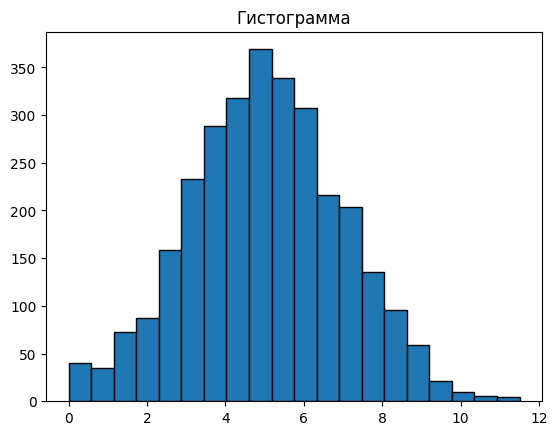

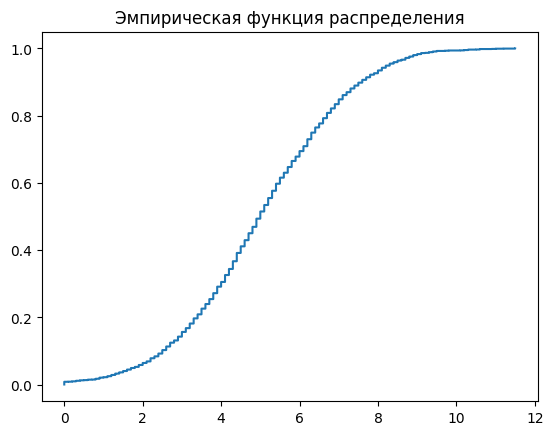

In [4]:
plt.plot()
plt.hist(x, bins=20, edgecolor="black")
plt.title("Гистограмма")

plt.show()

plt.plot()
sorted_x = np.sort(x)
y = np.arange(1, len(x)+1) / len(x)
plt.step(sorted_x, y, where="post")
plt.title("Эмпирическая функция распределения")

plt.show()


Данные ведут себя почти как нормальное распределение — симметричные, с умеренным разбросом.

In [5]:
hist, bins = np.histogram(x, bins="auto")
observed = hist
expected = len(x) * (stats.norm.cdf(bins[1:], mean, np.std(x)) - stats.norm.cdf(bins[:-1], mean, np.std(x)))

chi2 = np.sum((observed - expected) ** 2 / expected)
df = len(observed) - 1 - 2
p_value = 1 - stats.chi2.cdf(chi2, df)

print(f"Хи-квадрат: {chi2:.3f}, p-value: {p_value:.3f}")

k2, p_normal = stats.normaltest(x)
print(f"Тест асимметрия+эксцесс: stat={k2:.3f}, p={p_normal:.3f}")


Хи-квадрат: 124.367, p-value: 0.000
Тест асимметрия+эксцесс: stat=2.089, p=0.352


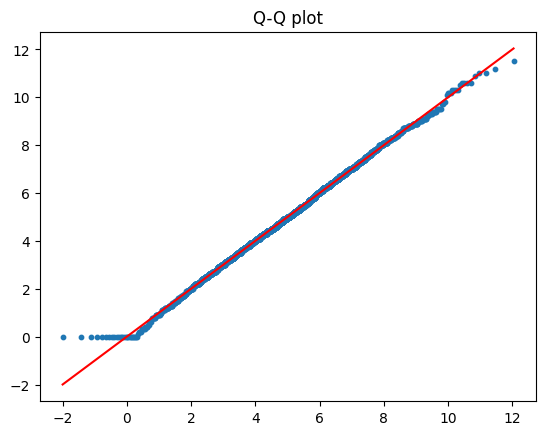

In [6]:
theor_q = stats.norm.ppf((np.arange(1, len(x)+1) - 0.5) / len(x), loc=mean, scale=np.std(x))
sample_q = np.sort(x)

plt.scatter(theor_q, sample_q, s=10)
plt.plot([theor_q.min(), theor_q.max()],
         [theor_q.min(), theor_q.max()],
         color="red")
plt.title("Q-Q plot")
plt.show()


Распределение близко к нормальному, но не идеально. Отличается в левой части.

In [7]:
# Удаление выбросов
z_scores = np.abs((x - np.mean(x)) / np.std(x))
filtered = x[z_scores < 3]

# Стандартизация
standardized = (filtered - np.mean(filtered)) / np.std(filtered)

# Логарифмирование
log_transformed = np.log1p(filtered)

datasets = {
    "Обрезка выбросов + стандартизация": standardized,
    "Обрезка выбросов + логарифм": log_transformed
}

for name, arr in datasets.items():
    print(f"\n{name}")
    print(f"Среднее={np.mean(arr):.3f}, Дисперсия={np.var(arr, ddof=1):.3f}, "
          f"Ассиметрия={stats.skew(arr):.3f}, Эксцесс={stats.kurtosis(arr):.3f}")
    k2, p_normal = stats.normaltest(arr)
    print(f"Тест нормальности: stat={k2:.3f}, p={p_normal:.3f}")



Обрезка выбросов + стандартизация
Среднее=0.000, Дисперсия=1.000, Ассиметрия=-0.020, Эксцесс=-0.196
Тест нормальности: stat=5.818, p=0.055

Обрезка выбросов + логарифм
Среднее=1.729, Дисперсия=0.151, Ассиметрия=-1.401, Эксцесс=3.342
Тест нормальности: stat=813.185, p=0.000


Лучше всего сработала комбинация «обрезка выбросов + стандартизация», распределение довольно близко к нормальному. Во втором случае всё ещё далеко.

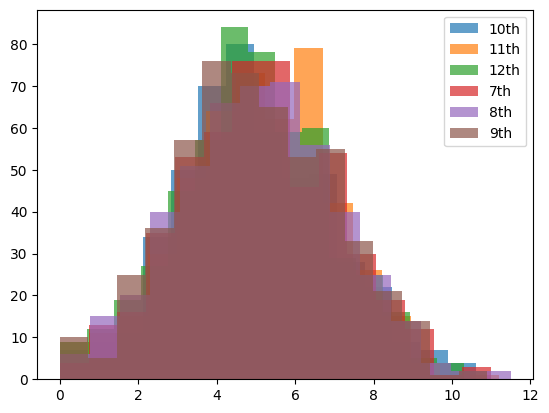

,mean,var
School_Grade,,
10th,4.977618,3.812605
11th,5.061795,3.635211
12th,4.936862,3.735589
7th,5.077062,3.883344
8th,5.066390,4.009513
9th,5.012167,3.912652


In [8]:
groups = data.groupby("School_Grade")[col]

for grade, vals in groups:
    plt.hist(vals, bins=15, alpha=0.7, label=f"{grade}")
plt.legend()
plt.show()

group_stats = groups.agg(["mean", "var"])
group_stats


Графики немного отличаются, но в среднем поведение примерно одинаковое у всех возрастных групп. 